$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Assignment 4: Classification with QDA, LDA, and Logistic Regression

**KUNAL MILIND VICHARE (CSUID: 831298231)**

## Overview

The objective of this assignment is to learn to apply different classification techniques such as ```QDA```, ```LDA```, ```Linear Logistic Regression & Non-Linear Logistic Regression``` on any given data set and analyze the behaviour of each of the classification algorithms. We also compare the results of the above classification techniques to determine which algorithm would perform the best among the four.

## Method

In this assignment, we will be applying following classification algorithms:
* Quadratic Discriminant Analysis
* Linear Discriminant Analysys
* Logistic Regression (Linear & Non Linear)

Let's understand the implementation of each of these algorithms and then apply them on sample data set.

### A) Quadratic Discriminant Analysis:
QDA is a genrative model based classification technique that involves developing a model of data for each class in the data set. In other words, we model the data such that it defines the probability distribution for the values in the given class. One of the peculiarities of QDA is that, the variance matrix is different for every class. We build a Gaussian probability distribution model to characterize the samples from every class. <br>
Gaussian Distribution model is given as follows,
 
 $$
p(\xv) = \frac{1}{2\pi^{d/2} |\Sigmav |^{1/2}}
      e^{-\frac{1}{2} (\xv-\muv)^T \Sigmav^{-1} (\xv - \muv)}
$$

where mean $\muv$ is a $d$-dimensional column vector and covariance
matrix $\Sigmav$ is a $d\times d$ symmetric matrix.

We use this disctribution to build our probilistic model to determine the probability that a given sample **x** belongs to class **k**. Mathematically, it can be expressed as $p(C=k|\xv)$. This forms the basis of generative classification techniques. 

We know the values of $p(\xv|C=k)$, which will be used to determine $p(C=k|\xv)$ usin Baye's rule. It is given as follows,

$$
   \begin{align*}
      p(C=k|\xv) &= \frac{p(\xv|C=k)p(C=k)}{p(\xv)}\\ 
      \end{align*}
$$

The samples would be categorized as class **k** if  $p(C=k|\xv)$ is maximum for that particular class.

Using the above normal distribution and bayes rule, we arrive at following equation,
$$
      \begin{align*}
        \delta_k(\xv) = -\frac{1}{2} \ln |\Sigma_k| -\frac{1}{2}(\xv-\muv_k)^T
\Sigma_k^{-1} (\xv-\muv_k) + \ln P(C=k)
      \end{align*}
$$

Where p(C=k) is the prior probability given as below. $$
\begin{align*}
p(C=k) &= \frac{N_k}{N}
\end{align*}
$$
 
<img src="http://www.cs.colostate.edu/~anderson/cs445/notebooks/twonormalsboundary.png", style="width: 250px;">

This is the discriminant function and the boundary for this function is quadratic in nature as seen in the above figure. Hence, it is referred as Quadratic Discriminant Analysis function. ALso, different eliptical shapes sampling the data points is due to different co-variance matrices. By maximizing the delta function obtained for a given sample above, we can categorize it as class **k**. Mathmatically,  $\argmax{k}\; \delta_k(\xv)$.

### B) Linear Discriminant Analysis:
Similar to QDA, Linear Discriminant Analysis algorithm is also a genrative distribution modelling algorithm. However, it uses the same co-variance matrix for each of the class. The shape of a boundary classifying the data points in to different classes is linear in nature. Thus, it is referred it as Linear Discriminant Analysis classification.

By using the same weighted average of the co-variance matrices for each class, the boundary would look as shown in below figure.

<img src="http://www.cs.colostate.edu/~anderson/cs445/notebooks/twonormalsboundary2lda.png", style="width: 250px;">
THe discriminant function for a linear shaped boundary would be as follows:

$$
      \begin{align*}
        \delta_k(\xv) = \xv^T \Sigmav^{-1} \muv_k - \frac{1}{2}\muv_k^T \Sigmav^{-1} \muv_k + \log
        P(C=k)
      \end{align*}
$$

Where p(C=k) is the prior probability given as below. $$
\begin{align*}
p(C=k) &= \frac{N_k}{N}
\end{align*}
$$

The covariance matrix is given as 
$$
\begin{align*}
\Sigmav = \sum_{k=1}^K \frac{N_k}{N} \Sigmav_k
\end{align*}
$$

**Note:** The python implementation for QDA and LDA will be taken from qdalda.py

### C) Linear Logistic Regression:
Logistic regression, similar to generative models (QDA/LDA) predicts $p(C=k|\xv)$. However, approach adapted to predict this value of probability is different which results directly in to $p(C=k|\xv)$ instead of deriving it from $p(\xv|C=k)$. Also, this algorithm focuses on maximizing the likelihood of data.

The probability that a given sample belongs to class k is given as shown below.
$$
    \begin{align*}
      g_k(\xv) = p(C=k|\xv) = \frac{f(\xv;\wv_k)}{\sum_{m=1}^K f(\xv;\wv_m)}
    \end{align*}
$$

As discussed, this algorithm proceeds with an objective of maximizing the following function.
$$
    \begin{align*}
      L(\wv) & = \prod_{n=1}^N \prod_{k=1}^K p(C=k\,|\, \xv_n) ^ {t_{n,k}}
    \end{align*}
$$

Using gradient ascent, the weights are updated as shown,
$$
      \begin{align*}
        \wv \leftarrow \wv + \alpha \grad_{\wv} LL(\wv)
      \end{align*}
$$

Upon solving the above equations, we reach at the following weights update rule
$$
        \wv_j  \leftarrow \wv_j + \alpha \sum_{n=1}^N
        (t_{n,j} - g_j(\xv_n)) \xv_n
$$

### D) Non-Linear Logistic Regression:
We can genralise this regression based classification technique by implementing a bunch of hidden untis or hidden layers. These layers add certain non-linearities depending on the depth of the layers. Thus, Neural Networks form the basis of Non-Linear Logistic Regression. Similar to above implementation of linear logistic regression, we maximize the log of the likelihood of data. 


$$
      \begin{align*}
        LL(\Vv,\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log
        g_{n,k} \text{ where }  g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^{K} \eby{m}}
      \end{align*}
$$

The gradient of the above loglikelihood is given as,

$$
      \begin{align*}
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$

Following are the steps to derive the gradient of the loglikelihood,

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        \Fv &= e^{\Yv}\\
        \Sv &= \Fv \ones{K}\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ sum across columns}\\
        \Gv &= \Fv / \left [ \Sv, \Sv,\ldots,\Sv \right ] \;\;\; \Sv \text{ are column vectors }\\
        LL &=  \sum \Tiv \log \Gv\\
        \grad_\Vv LL &=    \tilde{\Xv}^T \left ( (\Tiv - \Gv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv LL &=   \tilde{\Zv}^T (\Tiv - \Gv)
      \end{align*}
$$

From the above set of equations, it is clear that non linear logistic regression is an extension to the linear regression with  neural neural networks studied previously. Here, we extend the output of our original neural networks by performing  exponentiation of output *Y*.

## 1) Implementation:

#### NeuralNetworkClassifier:

We use ```"neuralnetworksA2.py"``` file as ```"neuralnetworkA4.py"``` with some modifications to perform logistic regression based classification. This file is named as ```"neuralnetowrkA4.py"``` which contains ```"NeuralNetworkClassifier"``` that extends NeuralNetwork class already defined. This NeuralNetworkClassifier class overrides following function to implement non-linear logistic regression.
* **_objectiveF**
* **_gradientF**
* **train**
* **use**


### 1.1) Test NeuralNetworksClassifier on Sampe Data

In [154]:
import numpy as np
import neuralnetworksA4 as nn

In [155]:
X = np.arange(10).reshape((-1, 1))
T = np.array([1]*5 + [2]*5).reshape((-1, 1))

In [156]:
netc = nn.NeuralNetworkClassifier(X.shape[1], [5, 5], len(np.unique(T)))
netc.train(X, T, 20)
print(netc)
print('T, Predicted')
print(np.hstack((T, netc.use(X))))

NeuralNetwork(1, [5, 5], 2)
   Network was trained for 21 iterations that took 0.0156 seconds. Final error is 0.0066306359693292915.
T, Predicted
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]


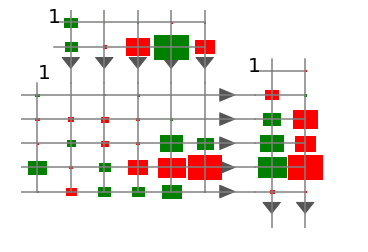

In [157]:
netc.draw()

**Observations:** 
From the above results we can see that, NeuralNetwokrClassfier model is able to correctly categorizes the classes of the sample data. The model is trained with 2 hidden layer with 5 hidden units in each.

### 1.2) Test Partition Function on Sample Data

#### mlutilities:
mlutilities.py has been modified with by implementing following functions in additiond to whwat was already present for the previous version of mlutilities.py file.

* **Partition**
* **confusionMatrix**
* **printConfusionMatrix**
* **makeIndicatorVars**

#### Data Partitioning: 
We use Partition function defined in mlutilities file to partition the data in training and test sets. For classification, we will be using stratified partitioning to have equal proportion of samples from every class in training and test sets. <br>

<br>**Note:** Following partitioning function has been added to *mlutilities.py*.

`**Partition(X, T, ratio = 0.5, classification=False,shuffle=False):**
- **Description:** This function performs two different partitioning based on the parameter 'classification'. Stratified partitioning is performed to get the equal proportion of samples of all the classes in training and test. Samples are randomly shuffled if shuffle is set to be true. 
- **Parameters:**<br>
X: Input feature array<br>
T: Target class array<br>
ratio: Partitioning fraction<br>
classification: True: Stratified Partitioning False: Regular Partitioning<br>
Shuffle: Random of normal partitioning<br>
- **Return value:** This function returns following values:<br>
Xtrain: Training Samples of X<br>
Ttrain: Training Samples of T<br>
Xtest: Testing Samples of X<br>
Ttest: Testing Samples of T<br>

In [158]:
def partition(X, T, ratio = 0.5, classification=False,shuffle=False):
    #-------------------------Normal Partitioning-------------------------
    if classification == False:
        print ("Regular Partitioning")
        nSamples = X.shape[0]                        # Get the  number of samples or rows in input matrix
        nRowsTrain = int(round(nSamples*ratio))      # Use the ratio of training samples specified in the parameter
        nRowsTest = nSamples - nRowsTrain            # Assign remaining samples to testing set
        sampleIndices = np.arange(nSamples)          # Return evenly spaced sample indices  
        if shuffle:                                  # If shuffle is true, reorder the sample randomly
            np.random.shuffle(sampleIndices)
        trainIndices = sampleIndices[:nRowsTrain]    # Extract the training indices from total samples
        testIndices = sampleIndices[nRowsTrain:]     # Extract the test indices from total sampels
        
        Xtrain = X[trainIndices, :]                  # Extract the input training set from original matrix
        Ttrain = T[trainIndices, :]                  # Extract the target training set from original target matrix
        Xtest = X[testIndices, :]                    # Extract the input training set from original matrix
        Ttest = T[testIndices, :]                    # Extract the target test set from original target matrix
    
    #-------------------------Stratified Partitioning-------------------------
    if classification == True:       
        trainIndices = [] 
        testIndices = []
        uniqueClasses = np.unique(T)                 # Identify the number of unique classes 
        
        for classes in uniqueClasses:                # Iterate through all the class to extract the proportional elements
            classSpecificIndices = np.where(T == classes)[0]                       # Indices of all the elements for classes
            if shuffle == True:
                classSpecificIndices = np.random.permutation(classSpecificIndices) # Randomly arranged if shuffle is True
            rowsInSpecificClass = len(classSpecificIndices)                        # Number of samples in given class
            trainLength = round(ratio*rowsInSpecificClass)                # Training sample length as per ratio 
            testLength = rowsInSpecificClass - trainLength                # Test sample length as per ratio
            trainIndices += classSpecificIndices[:trainLength].tolist()   # Extract training indices
            testIndices += classSpecificIndices[trainLength:].tolist()    # Extract test indices
        
        Xtrain = X[trainIndices,:]                    # Extract the input training set from original matrix
        Ttrain = T[trainIndices,:]                    # Extract the target training set from original target matrix
        Xtest = X[testIndices,:]                      # Extract the input training set from original matrix
        Ttest = T[testIndices,:]                      # Extract the target test set from original target matrix
    
    return Xtrain,Ttrain,Xtest,Ttest


In [159]:
import mlutilities as ml
Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, 0.6, classification=True)

In [160]:
Xtrain

array([[0],
       [1],
       [2],
       [5],
       [6],
       [7]])

In [161]:
Ttrain

array([[1],
       [1],
       [1],
       [2],
       [2],
       [2]])

In [162]:
Xtest

array([[3],
       [4],
       [8],
       [9]])

In [163]:
Ttest

array([[1],
       [1],
       [2],
       [2]])

**Observations:** 
From the above results, we can see that the partition function correctly performs stratified partition. As per the original proportion of samples belonging to different classes, the samples are correctly distrubited in training and testing sets. In other words, ratio of number of samples in class 1 to number of samples in class 2 from trainig and testing set is approximately equal to that of the same ratio from samples in X. 

### 1.3) Comparing results of LDA/QDA/LogReg  on Sample Data

Now, let's apply the QDA, LDA, and Logistic Regression  algorithms on the above sample data. In this, the QDA and LDA functions will be used from ```"qdalda.py"```file referred from ```"Lecture Notes 12: Intro to Classification"```.

#### 1.3.1) Train and Evaluate QDA based model

In [164]:
import qdalda 
qda = qdalda.QDA()           # Create an object of QDA
qda.train(Xtrain, Ttrain)    # Train the model using QDA
Ytrain = qda.use(Xtrain)     # Use the model to get predicted values on training set
Ytest = qda.use(Xtest)       # Use the model to get predicted values on testing set

#### 1.3.2) Percentage of Correct Prediction on Training Samples (QDA)

In [165]:
print(np.hstack((Ttrain, Ytrain)))

[[1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [166]:
np.sum(Ttrain == Ytrain) / len(Ttrain) * 100  # Percentage of correct prediction on training data

100.0

#### 1.3.3) Percentage of Correct Prediction on Testing Samples (QDA)

In [167]:
print(np.hstack((Ttest, Ytest)))

[[1 1]
 [1 2]
 [2 2]
 [2 2]]


In [168]:
np.sum(Ttest == Ytest) / len(Ttest) * 100     # Percentage of correct prediction on testing data

75.0

#### 1.3.4) Train and Evaluate LDA based model

In [169]:
lda = qdalda.LDA()
lda.train(Xtrain, Ttrain)
Ytrain = lda.use(Xtrain)
Ytest = lda.use(Xtest)

In [170]:
print(np.hstack((Ttrain, Ytrain)))

[[1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [171]:
print(np.hstack((Ttest, Ytest)))

[[1 1]
 [1 2]
 [2 2]
 [2 2]]


#### 1.3.5) Percentage of Correct Prediction on Training Samples (LDA)

In [172]:
np.sum(Ttrain == Ytrain) / len(Ttrain) * 100

100.0

#### 1.3.6) Percentage of Correct Prediction on Testing Samples (LDA)

In [173]:
np.sum(Ttest == Ytest) / len(Ttest) * 100

75.0

#### 1.3.7) Confusion Matrix: (LDA)
Confusion matrix indicates the percentage of samples correctly predicted.

In [174]:
ml.confusionMatrix(Ttrain, Ytrain, [1, 2]);

       1    2
    ------------
 1 |100.0  0  
 2 |  0  100.0


In [175]:
ml.confusionMatrix(Ttest, Ytest, [1, 2]);

       1    2
    ------------
 1 | 50.0 50.0
 2 |  0  100.0


**Observations:**
* From the confusion matrix of Training samples using LDA shows that 100 percent of class 1 sample are correctly predicted as class 1. Similarly, 100 percent of class 2 samples are correctly predicted as class 2. 
* From confusion matrix of testing data, 50 percent of class 1 data is correctly predicted as class 1 and 50 percent of class 1 samples are incorrectly predicted as class 2. However, there is no misprediction of class 2 samples. 100 percent of samples from class 2 are correctly predicted as class 2.

#### 1.3.8) Train & Evaluate Non-Linear Logistic Regression Based Model


In [176]:
netc = nn.NeuralNetworkClassifier(X.shape[1], [5, 5], len(np.unique(T)))
netc.train(Xtrain, Ttrain, 100)
print(netc)
print('T, Predicted')
Ytrain = netc.use(Xtrain)
Ytest = netc.use(Xtest)

NeuralNetwork(1, [5, 5], 2)
   Network was trained for 101 iterations that took 0.0341 seconds. Final error is 3.041686791657381e-09.
T, Predicted


In [177]:
print(np.hstack((Ttrain, Ytrain)))

[[1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [178]:
print(np.hstack((Ttest, Ytest)))

[[1 1]
 [1 2]
 [2 2]
 [2 2]]


In [179]:
np.sum(Ttrain == Ytrain) / len(Ttrain) * 100

100.0

In [180]:
np.sum(Ttest == Ytest) / len(Ttest) * 100

75.0

In [181]:
ml.confusionMatrix(Ttrain, Ytrain, [1, 2]);

       1    2
    ------------
 1 |100.0  0  
 2 |  0  100.0


In [182]:
ml.confusionMatrix(Ttest, Ytest, [1, 2]);

       1    2
    ------------
 1 | 50.0 50.0
 2 |  0  100.0


**Observations:** 
* Considering the percentages of correct prediction obtained above, we see that, 100 percent of class 1 data from training set is correctly classified as class 1. Similar results are observed for class 2. 
* However, only 75 percent of test data is correctly classified.

#### 1.3.9) Train & Evaluate Linear Logistic Regression Based Classification

In [183]:
netc = nn.NeuralNetworkClassifier(X.shape[1], 0, len(np.unique(T)))
netc.train(Xtrain, Ttrain, 100)
print(netc)
print('T, Predicted')
Ytrain = netc.use(Xtrain)
Ytest = netc.use(Xtest)

NeuralNetwork(1, [], 2)
   Network was trained for 101 iterations that took 0.0291 seconds. Final error is 1.2254540857816285e-05.
T, Predicted


In [184]:
print(np.hstack((Ttrain, Ytrain)))

[[1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [185]:
print(np.hstack((Ttest, Ytest)))

[[1 1]
 [1 2]
 [2 2]
 [2 2]]


In [186]:
ml.confusionMatrix(Ttrain, Ytrain, [1, 2]);

       1    2
    ------------
 1 |100.0  0  
 2 |  0  100.0


In [187]:
ml.confusionMatrix(Ttest, Ytest, [1, 2]);

       1    2
    ------------
 1 | 50.0 50.0
 2 |  0  100.0


**Observations:**
Upon applying linear logistic linear regression classification algorithm on sample data, following observations made.
* The model is correctly able to predict the classes of all the training samples. Hence, the percentage of accuracy is 100 percent for training data.
* With testing samples, only 75 percent of data is correctly predicted. 50 percent of class one samples are incorrectly predicted as class 2. Howvever, 100 percent correct prediction is made for samples from class 2.

## 2) Data Analysis & Partitioning

### 2.1 Data Analysis:
In this section, we will be performing the analysis of different classification algorithms using data from orthopedic patients downloaded from [this Kaggle site](https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients).
The data file ```column_3C_weka.csv``` is read in and then classification algorithms are applied on it.

Following target variable is used to classify the samples in the given data set. ```Section 2.1.2``` below shows how to convert the class name to class number.

|Target Parameter|Class Names|Class Number|
|--------------|----|----|
|Class|Hernia|Class 1|
||Normal|Class 2|
||Spondylolisthesis|Class 3|

Let's take a look at the input parameters or feature variables used as inputs to our classification models.

|Sr. No.|Input Parameters|
|-----|--------------|
|1|pelvic_incidence|
|2|pelvic_tilt|
|3|lumbar_lordosis_angle|
|4|sacral_slope|
|5|pelvic_radius|
|6|degree_spondylolisthesis|

**Note:** Number of samples in ```column_3C_weka.csv``` file corresponds to number of rows in X(input) or T(target) matrix.

|Parameter|Data Summary|
|-----|--------------|
|No. of rows in X   |310|
|No. of columns in X   |6|
|No. of rows in T   |310|
|No. of columns in T   |1|

The above data is partitioned into 80% (248 Samples) for training and 20% (62 Samples) for testing. We apply stratified partition so as to get same proportional of samples from each class in training and testing data sets.


#### 2.1.1) Import Packages

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 2.1.2) Read Data & Convert Class Variable From String to Int
**loadAndModifyOpdData(filename):**
- **Description:** This function reads the file specified in the parameter and modifies the string values in the class column with corresponding class numbers. 
- **Parameters:**<br>
filename: Name of the data file to be read for analysis. The file specified in the filename parameter should be present in the current directory.
- **Return value:** This function returns following values:<br>
modifiedDataFrame:      Data Frame consisting of modified class values. ['Hernia': 1, 'Normal': 2, 'Spondylolisthesis':3]<br>
dataFrame: Original Data Frame

In [189]:
def loadAndModifyOpdData(fileName):
    dataFrame = pd.read_csv(fileName, delimiter=',')            # dataFrame with original values
    modifiedDataFrame = pd.read_csv(fileName, delimiter=',')    # modifiedDataFrame for modified values
    
    classes = np.unique(dataFrame['class'])                     #['Hernia': 1, 'Normal': 2, 'Spondylolisthesis': 3]
    print ('{:s} {:}'.format('Unique Classes in the given data set:',classes))
    modifiedDataFrame['class'].replace({classes[0] : 1, classes[1]: 2, classes[2]: 3},inplace=True)
    return modifiedDataFrame,dataFrame                          # return modifiedDataFrame and OriginalDataFrame
    

#### 2.1.3) Converting Pandas Dataframe to Numpy Array
The above function returns the data frame in pandas. We will convert the above data frame to a numpy array using values attributes.

In [190]:
modDF,DF = loadAndModifyOpdData('column_3C_weka.csv')           # Dataframes of colum_3C_weka.csv
dataOrig = DF.values                                            # Convert original dataframe to Numpy Array
data = modDF.values                                             # Convert modified dataframe to Numpy Array
data

Unique Classes in the given data set: ['Hernia' 'Normal' 'Spondylolisthesis']


array([[  63.0278175 ,   22.55258597,   39.60911701, ...,   98.67291675,
          -0.25439999,    1.        ],
       [  39.05695098,   10.06099147,   25.01537822, ...,  114.4054254 ,
           4.56425864,    1.        ],
       [  68.83202098,   22.21848205,   50.09219357, ...,  105.9851355 ,
          -3.53031731,    1.        ],
       ..., 
       [  61.44659663,   22.6949683 ,   46.17034732, ...,  125.6707246 ,
          -2.70787952,    2.        ],
       [  45.25279209,    8.69315736,   41.5831264 , ...,  118.5458418 ,
           0.21475017,    2.        ],
       [  33.84164075,    5.07399141,   36.64123294, ...,  123.9452436 ,
          -0.19924909,    2.        ]])

Now, we will be comparing the modified dataframe and the original data frame to see if the number of samples belonging to a particular class is matching.

In [191]:
headings = modDF.columns.tolist()
print(headings)
print('{:s} {:}'.format("No. of Samples in Class Hernia            :-",len(np.where(dataOrig[:,-1] == 'Hernia')[0].tolist())))
print('{:s} {:}'.format("No. of Samples in Class 1                 :-",len(np.where(data[:,-1] == 1)[0].tolist())))

print('{:s} {:}'.format("No. of Samples in Class Normal            :-",len(np.where(dataOrig[:,-1] == 'Normal')[0].tolist())))
print('{:s} {:}'.format("No. of Samples in Class 2                 :-",len(np.where(data[:,-1] == 2)[0].tolist())))

print('{:s} {:}'.format("No. of Samples in Class Spondylolisthesis :-",len(np.where(dataOrig[:,-1] == 'Spondylolisthesis')[0].tolist())))
print('{:s} {:}'.format("No. of Samples in Class 3                 :-",len(np.where(data[:,-1] == 3)[0].tolist())))

print('{:s} {:}'.format("Total No. of Samples:-",data.shape))


['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']
No. of Samples in Class Hernia            :- 60
No. of Samples in Class 1                 :- 60
No. of Samples in Class Normal            :- 100
No. of Samples in Class 2                 :- 100
No. of Samples in Class Spondylolisthesis :- 150
No. of Samples in Class 3                 :- 150
Total No. of Samples:- (310, 7)


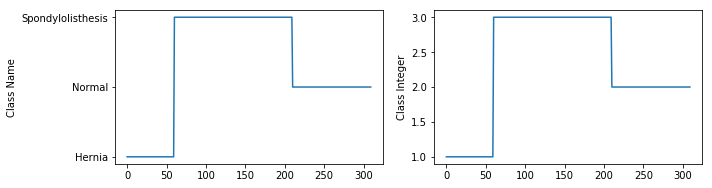

In [192]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(DF.values[:,-1])
plt.ylabel("Class Name")
;
plt.subplot(2,2,2)
plt.plot(modDF.values[:,-1])
plt.ylabel("Class Integer")
plt.tight_layout()

**Observations: **
As can be seen from the above results, number of samples belonging to a particular class before replacing the string values **'Hernia', 'Normal' and 'Spondylolisthesis'** with **1, 2, and 3** is matching with the ones after replacing. The first 60 samples belong to class 0 or 'Hernia', the next 150 samples belong to class 2 or 'Spondylolisthesis' and the last 100 samples belong to class 1 or 'Normal'. From this, we can conclude that the replace function has appropriately replaced the string values with corresponding class integers.

### 2.2) Extract Features and Targets from DataSet:


Considering the numpy array 'data' for the above data set, we see that there are 310 samples in total and 7 attributes. Of these 7 attributes, first 6 attributes are used as input features and the last attribute called 'class' is used as class target variables to be predicted.

In [193]:
X = data[:,0:6]                 # Extract Input Features
T = data[:,-1].reshape(-1,1)    # Extract Classes
print('{:s} {:}'.format("Dimensions of X :-",X.shape))
print('{:s} {:}'.format("Dimensions of T :-",T.shape))


Dimensions of X :- (310, 6)
Dimensions of T :- (310, 1)


Let's now understand the range of each of the feature variables in the given data set

### 2.3 Range of Features:

In [194]:
print('{:s} {:s} {:.3f} {:s} {:.3f}'.format(headings[0], "        " ,min(data[:,0]),"",max(data[:,0])))
print('{:s} {:s} {:.3f} {:s} {:.3f}'.format(headings[1], "             " ,  min(data[:,1]),"",max(data[:,1])))
print('{:s} {:s} {:.3f} {:s} {:.3f}'.format(headings[2], "   " ,  min(data[:,2]),"",max(data[:,2])))
print('{:s} {:s} {:.3f} {:s} {:.3f}'.format(headings[3], "            " ,  min(data[:,3]),"",max(data[:,3])))
print('{:s} {:s} {:.3f} {:s} {:.3f}'.format(headings[4], "           " ,  min(data[:,4]),"",max(data[:,4])))
print('{:s} {:s} {:.3f} {:s} {:.3f}'.format(headings[5], "" ,  min(data[:,5]),"",max(data[:,5])))
print('{:s} {:s} {:.3f} {:s} {:.3f}'.format(headings[6], "                   " ,  min(data[:,6]),"",max(data[:,6])))

pelvic_incidence          26.148  129.834
pelvic_tilt               -6.555  49.432
lumbar_lordosis_angle     14.000  125.742
sacral_slope              13.367  121.430
pelvic_radius             70.083  163.071
degree_spondylolisthesis  -11.058  418.543
class                     1.000  3.000


Let's plot each of the feature values with respect to the targets they belong to.
### 2.4 Feature Plots:

Total Number of Samples Plotted below 310


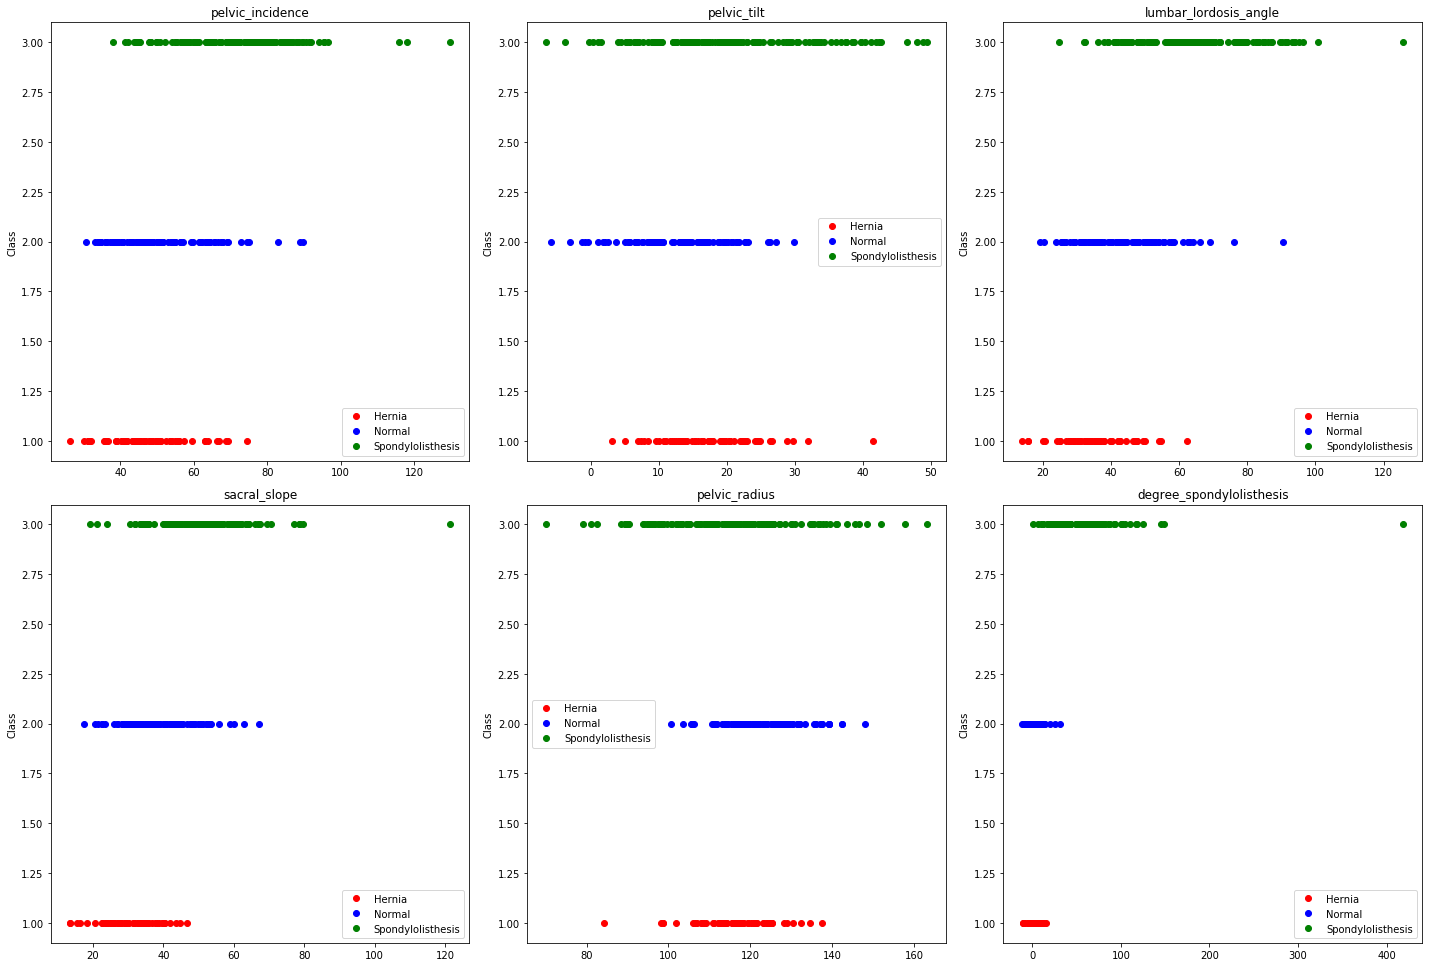

In [195]:
herniaIndices = np.where(data[:,-1] == 1)[0].tolist()
normalIndices = np.where(data[:,-1] == 2)[0].tolist()
spondIndices = np.where(data[:,-1] == 3)[0].tolist()
print ('{:s} {:}'.format("Total Number of Samples Plotted below", len(herniaIndices+normalIndices+spondIndices)))
plt.figure(figsize=(20,20))
for i in range(0,6):
    plt.subplot(3,3,i+1)
    plt.plot(X[herniaIndices,i],T[herniaIndices],'ro',label="Hernia")
    plt.plot(X[normalIndices,i],T[normalIndices],'bo',label="Normal")
    plt.plot(X[spondIndices,i],T[spondIndices],'go',label="Spondylolisthesis")
    plt.ylabel('Class')
    plt.title(headings[i])
    plt.legend(loc='best')
plt.tight_layout()
    

**Observations:** From the above plots, we can see how the data is disctributed in every class. The range of each of the feature varibales is verified with the values obtained in section 2.3.

### 2.5 Stratified Partitioning of Data
As given in the problem statement, we will be partitioning the data randomly by setting shuffle as True. ALso, the partitioning fraction is 0.8 as specified. The below function will create partitions with 80percent of total samples from X and T to train different models and remaining 20 percent to test the accuracy of the models.  <br>

In [196]:
import mlutilities as ml 
Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, 0.8, classification=True, shuffle=True)

In [197]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape
print('{:s} {:}'.format("Dimensions of Xtrain :-",Xtrain.shape))
print('{:s} {:}'.format("Dimensions of Ttrain :-",Ttrain.shape))
print('{:s} {:}'.format("Dimensions of Xtest :-",Xtest.shape))
print('{:s} {:}'.format("Dimensions of Ttest :-",Ttest.shape))

classInT = np.unique(T)
print('   Class  Occurrences')
for i in classInT:
    print('{:5g} {:10d}'.format(i, np.sum(T==i)))

print('\nPartitions in Training Set')

classInTrain = np.unique(Ttrain)
print('   Class  Occurrences')
for i in classInTrain:
    print('{:5g} {:10d}'.format(i, np.sum(Ttrain==i)))

print('\nPartitions in Test Set')
    
classInTest = np.unique(Ttest)
print('   Class  Occurrences')
for i in classInTest:
    print('{:5g} {:10d}'.format(i, np.sum(Ttest==i)))

Dimensions of Xtrain :- (248, 6)
Dimensions of Ttrain :- (248, 1)
Dimensions of Xtest :- (62, 6)
Dimensions of Ttest :- (62, 1)
   Class  Occurrences
    1         60
    2        100
    3        150

Partitions in Training Set
   Class  Occurrences
    1         48
    2         80
    3        120

Partitions in Test Set
   Class  Occurrences
    1         12
    2         20
    3         30


**Observations:** From above values we can see that each of the training and testing sets have equal proportion of samples from each of the classes. i.e the ratios 60/100, 60/150, 100/150 are equal to 48/80, 48/120, 80/120 and 12/20, 12/30 & 20/30. Hence, we can say that samples from each of the classes are proportinally distributed in training and testing data sets.

## 3) Data Classification using QDA/LDA & Logistic Regression:

In this section, we will use the above partitions to train and test the accuracy of different classification algorithms.

**percentCorrect(predictedTargets, actualTargets)**
- **Description:** This function computes the percentage of correct predictions based on the specified predicted and actual target classes.<br>
- **Parameters:**<br>
predictedTargets: Prediction obtained from the output of Use Function<br>
actualTargets: Target values array<br>
- **Return value:** This function returns percentage of correct prediction for a given model

In [198]:
def percentCorrect(predictedTargets, actualTargets):
    return np.sum(predictedTargets.ravel()==actualTargets.ravel()) / float(len(actualTargets)) * 100

### 3.1) Classification using QDA:
**Note: Due some warnings indicating negative determinant QDA results were poor. I have used catchNegative function to handle the negative determinants.**

#### 3.1.1) Train QDA Model:
In this section, we will be training the model with Quadratic Discriminant Analysis algorithm. The QDA object is created and then train function is called on that object. 

In [199]:
import qdalda
qda = qdalda.QDA()
qda.train(Xtrain, Ttrain)
qda

QDA trained for classes [ 1.  2.  3.]

#### 3.1.2) Evaluate QDA Model

Now that we have trained the QDA model, let us see how well it predicts the targets for training and testing data.

In [200]:
Ytrain, probTrain, _ = qda.use(Xtrain, allOutputs=True)              # Evaluate model on Training data
Ytest, probTest,_= qda.use(Xtest, allOutputs=True)                 # Evaluate model on Testing data
#np.hstack((Ttrain, Ytrain))

#### 3.1.3) Plots:

We will be plotting the results of the above use functions with the actual targets in training and testing sets. 

##### A) Ttrain Vs Ytrain: 

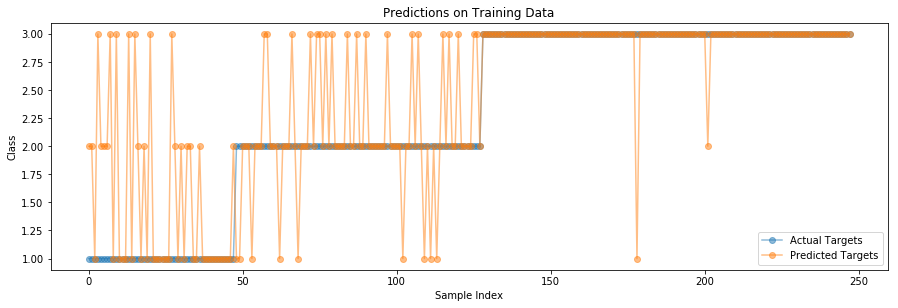

In [201]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1 ,1)
plt.plot(np.hstack((Ttrain, Ytrain)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

**Observations:**
* From the above figure which shows the results of predictions on training data, we see that less number of samples that belong to class 1 ```'Hernia'``` are correctly classified as class 1. Most of the samples in class one are incorrectly classified as class 2 or class 3.
* The prediction on samples in class 2 went slightly better than class 1 sample. Majority of samples from class 2 are incorrectly classified as class 3 and some are also classified as class 1.
* From the Predicted targets for samples in class 3, only a few samples are incorrectly classfied as class 2. This can be because of the biasing toward class 3 samples which are more in number than class 2 and class 1 samples.

Let's see how well the model was able to predicted the targets on test data.

**Note:** The observations will change every time the code block is executed. 

##### B) Ttest Vs Ytest:

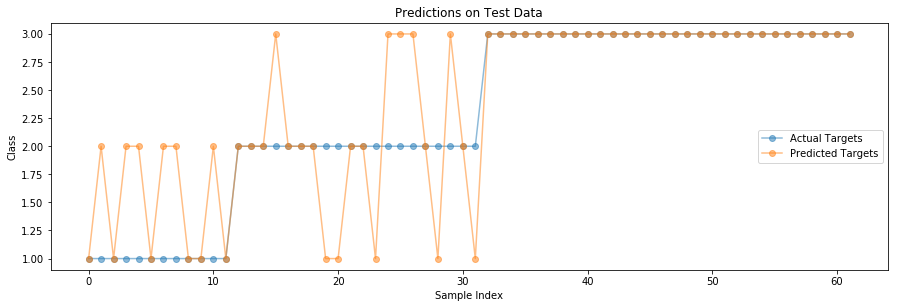

In [202]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1 ,1)
plt.plot(np.hstack((Ttest, Ytest)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='right')

**Observations:**
* From the above plot, we see that few samples that belong to class 1 are incorrectly predicted as class 2.
* Also, few samples from class 2 are incorrectly predicted as class 3 and class 1. Another interesting observation is, the prediction of class 3 samples in test partition is 100 percent which, as discussed previously, is due to the biased training on class 3 samples as they are significantly higher in number than class 2 and class 1.


**Note:** The observations may change every time the code block is executed. I have tried to generalize the observations based on multiple runs.

#### 3.1.4) Confusion Matrix:
Confusion matrix will give us an idea of how the percentage of correct prediction is distributed accross all the classes for training and testing data sets.

##### A) Training Set Confusion Matrix:

In [203]:
cm = ml.confusionMatrix(Ttrain, Ytrain, np.unique(Ttrain).astype(int))

       1    2    3
    ------------------
 1 | 58.3 27.1 14.6
 2 | 11.2 65.0 23.8
 3 |  0.8  0.8 98.3


**Observations:** <br>From the above confusion matrix, we see that 58.3 percent samples from class 1 are correctly predicted as class one. Whereas, 27 percent of samples from class 1 are incorrectly predicted as class 2 and 14.6 percent of samples from class 1 in training set are incorrectly classified as class 3.
Similarly, 65 samples from class 2 are correctly classified and 98.3 percent samples from class 3 are correctly classified.

##### B) Test Set Confusion Matrix:

In [204]:
cm = ml.confusionMatrix(Ttest, Ytest, np.unique(Ttest).astype(int))

       1    2    3
    ------------------
 1 | 50.0 50.0  0  
 2 | 25.0 50.0 25.0
 3 |  0    0  100.0


**Observations:** 
* From the above confusion matrix, we see that 50percent of the samples from class one are predicted correctly. Remaining samples are incorrectly predicted as class 2.
* From class 2 readings, we see that 50 percent of samples are correctly classfied as class 2 and remaining are incorrectly classified as class 1 and class 3.
* Similarly, 100 percent of class 3 samples are accurately predicted.

#### 3.1.5) Percentage of Correct Prediction:

In [205]:
print('{:s} {:}'.format('Percentage of Correct Prediction with QDA on Training Data',percentCorrect(Ytrain, Ttrain)))
print('{:s} {:}'.format('Percentage of Correct Prediction with QDA on Test Data',percentCorrect(Ytest, Ttest)))


Percentage of Correct Prediction with QDA on Training Data 79.83870967741935
Percentage of Correct Prediction with QDA on Test Data 74.19354838709677


**Observations:**
<br> From above values we can say that accuracy of QDA on the test set of given data is 74.1935 percent.

<br> Let us now analyze the behaviour of LDA model on the given data set.

### 3.2) Classification Using LDA

#### 3.2.1) Train LDA Model:
In this section, we will be training the model with Linear Discriminant Analysis algorithm. The LDA object is created and then train function is called on that object. 

In [206]:
import qdalda
lda = qdalda.LDA()
lda.train(Xtrain, Ttrain)

#### 3.2.2) Evaluate LDA Model

Once the model is trained, we will evaluate it's performance by using the model on training and testing samples.

In [207]:
Ytrain, probTrain, _ = lda.use(Xtrain, allOutputs=True)              # Evaluate model on Training data
Ytest, probTest,_= lda.use(Xtest, allOutputs=True)                 # Evaluate model on Testing data
#np.hstack((Ttrain, Ytrain))

#### 3.2.3) Plots:

We will be plotting the results of the above use functions with the actual targets in training and testing sets. Let's first plot the output of use function on Training set Vs the actual targets in the training sets.

##### A) Ttrain Vs Ytrain: 

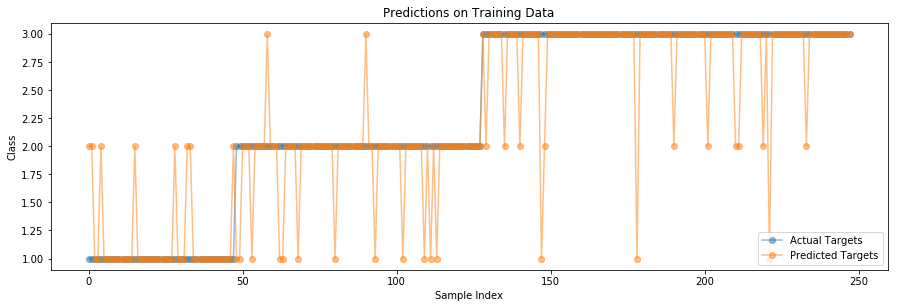

In [208]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1 ,1)
plt.plot(np.hstack((Ttrain, Ytrain)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

**Observations:**
* From the above figure we see that few samples from class one are incorrectly predicted as class 2. However, majority of samples from class one are correctly classfied as class 1.
* For samples from class 2, this algorithm also seems to perform well. Most of samples are correctly identified. However, a couple samples from class 2 are classfied as class 3 and few samples are classified as class 1.
* Similar results are observed on samples from class 3. Majority of class 3 samples are correctly classfied as class 3. However, some samples are mispredicted as class 2 and class 1. 
* In sum, LDA does seem to perform better than QDA on predicting class variables of training samples.

##### B) Ttest Vs Ytest:

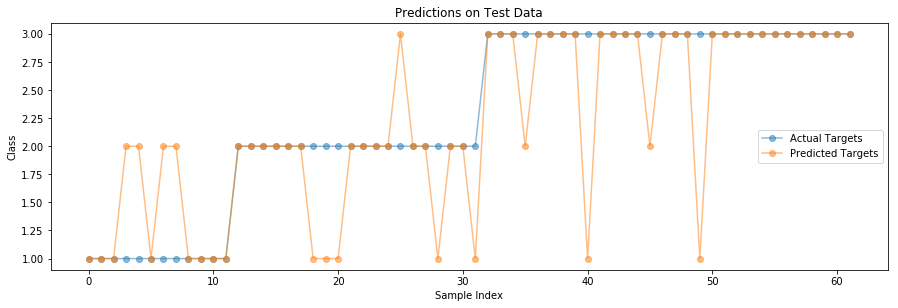

In [209]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1 ,1)
plt.plot(np.hstack((Ttest, Ytest)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='right')

**Observations:**<br>
From the above plot of actual target values and predicted target values from Testing samples, we can see that some samples from class one are incorrectly classified as class 2. A few samples from class 2 are incorrrectly classified as class 1 and class 3. The prediction of target classes for samples in class 3 is pretty well. Very few samples are incorrectly predicted compared with samples from other classes.<br>

**Note:** The observations will change every time the code block is executed. I have made generalised observations based on multiple runs.

#### 3.2.4) Confusion Matrix:
Let's verify the above plots with confusion matrix of model used on training and testing samples.

##### A) Training Set Confusion Matrix (LDA):

In [210]:
cm = ml.confusionMatrix(Ttrain, Ytrain, np.unique(Ttrain).astype(int))

       1    2    3
    ------------------
 1 | 83.3 16.7  0  
 2 | 15.0 82.5  2.5
 3 |  2.5  8.3 89.2


**Observations:**<br>
* From the confusion matrix obtained in the previous code block, we can see that 83 percent of samples from class 1 are correctly classified. However, 16.7 percent of training samples from class 1 are incorrectly classified as class 2.
* Also, 82.5 percent of class 2 samples are correctly classified as class 2. Remaining samples are incorrectly classified as class 1 and class 3.
* Similarly, 89.2 percent of class 3 samples are correctly predicted as class 3 and remaining samples are mispredicted as class 1 and class 2.

**Note:** The values mentioned in the observations may not match with the above confusion matrix if the above code block is rerun.

##### B) Testing Set Confusion Matrix (LDA):

In [211]:
cm = ml.confusionMatrix(Ttest, Ytest, np.unique(Ttest).astype(int))

       1    2    3
    ------------------
 1 | 66.7 33.3  0  
 2 | 25.0 70.0  5.0
 3 |  6.7  6.7 86.7


**Observations:**<br>
* Considering the above confusion matrix, we see that 66.7 percent of test samples from class one is correctly classified as class 1. However, 33.3 percent of class 1 samples in test set is mispredicted as class 2. 
* Also, 70 percent of class 1 data is correctly classified as class 2. However, 25 percent of class 2 data is misclassified as class 1 and remaining as class 3.
* Similarly, 86.7 percent of class 3 data is correctly predicted which is significantly higher accuracy than prediction of samples from class 1 and class 2.
**Note:** The values mentioned in the observations may not match with the above confusion matrix if the above code block is rerun.

**Observations**: The above warninig due to the negative value of determinant passed to np.log function which is due to limited floating point precision. 

#### 3.2.5) Percentage of Correct Prediction (LDA):

In [212]:
print('{:s} {:}'.format('Percentage of Correct Prediction with LDA on Training Data :',percentCorrect(Ytrain, Ttrain)))
print('{:s} {:}'.format('Percentage of Correct Prediction with LDA on Test Data     :',percentCorrect(Ytest, Ttest)))


Percentage of Correct Prediction with LDA on Training Data : 85.88709677419355
Percentage of Correct Prediction with LDA on Test Data     : 77.41935483870968


**Observations:**
<br> From above values we can say that accuracy of LDA model on the test set of given data is 77.419 percent wich is slightly better than QDA based models.


### 3.3) Classification Using Non-Linear Logistic Regression

In this section, we will be training the model with Non-Linear Logistic Regression algorithm. As mentioned earlier, neural networks class from neuralnetworksA2.py is extended in NeuralNetworkClassifier class to perform Logistic Regression based classification.

#### Let's train the non-linear logistic regression model with different configurations of hidden layers and  and then evaluate its performance.
#### A) Hidden Layers Structure: [5, 5] | Training Iterations: 100

#### A.1) Train Neural Network:

In [213]:
import neuralnetworksA4 as nn

netc = nn.NeuralNetworkClassifier(X.shape[1], [5,5], len(np.unique(T)))
netc.train(Xtrain, Ttrain, 100, verbose=True)
print(netc)

SCG: Iteration 10 fValue Eval 0.221903684007 Scale 0.032768
SCG: Iteration 20 fValue Eval 0.0918673731497 Scale 0.000512
SCG: Iteration 30 fValue Eval 0.0833181360919 Scale 5e-07
SCG: Iteration 40 fValue Eval 0.0749732817637 Scale 4.8828125e-10
SCG: Iteration 50 fValue Eval 0.0674078801134 Scale 4.76837158203125e-13
SCG: Iteration 60 fValue Eval 0.0601785566393 Scale 1e-15
SCG: Iteration 70 fValue Eval 0.0569390186385 Scale 1e-15
SCG: Iteration 80 fValue Eval 0.0539513515778 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.0521958125793 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.05073021954 Scale 1e-15
NeuralNetwork(6, [5, 5], 3)
   Network was trained for 101 iterations that took 0.1243 seconds. Final error is 0.225233699831988.


#### A.2) Evaluate Neural Netowrk:

##### A.2.1) Likelihood Plot & Neural Network Structure:

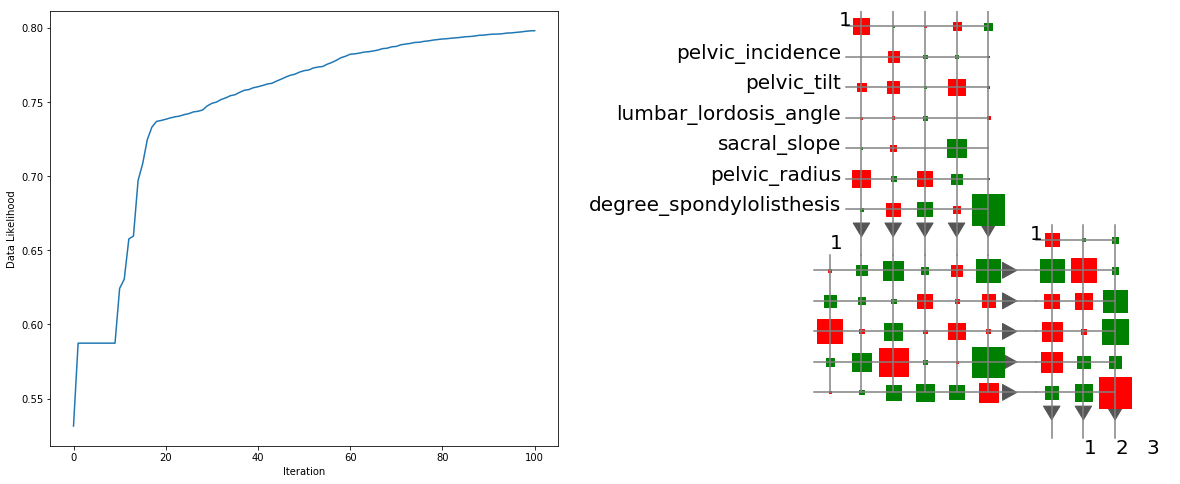

In [214]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.plot(np.exp(-netc.getErrors()))      # negate as scg is meant to minimize the function
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')
plt.subplot(1, 2, 2)
netc.draw(inputNames = headings[0:6], outputNames = np.unique(modDF['class']).tolist())


**Observations:** 
* The above data likelihood plot shows how the likelihood is being maximized closer to 0.8. As we are training rthe network for 100 iterations, the maximum likelihood achieved is approximately near 0.8. 
* For intial 20 iterations ther is a steep increase in the likelihood after which the slope reduces thus gradually increasing the likelihood upto 0.8.
* We can further increase the likelihood of data by either changing the number of training iterations or trying a bigger or deeper network.
* From the network structure, we can see that certain inputs are connected to higer positive weights(Green Boxes) and certain inputs are connected to negative weights (Red Boxes). 
* Ouput layer structure shows how the 6 inputs are affecting the outputs based on the magnitude and sign of weights.

##### A.2.2) Target Prediction for Training and Testing samples:

Here, we will be using the above trained model on training and testing samples and observe the plots of predictions.

Percentage of Correct Prediction with NLR on Training Data : 93.54838709677419
Percentage of Correct Prediction with NLR on Test Data     : 79.03225806451613


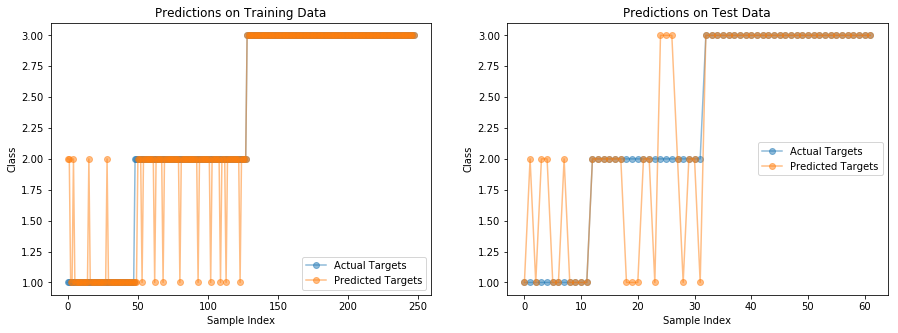

In [215]:
Ytrain = netc.use(Xtrain)                      # Use the above trainied model on Training Data 
Ytest = netc.use(Xtest)                        # Use the above trainied model on Testing Data

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.hstack((Ttrain, Ytrain)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(1, 2 ,2)
plt.plot(np.hstack((Ttest, Ytest)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='right')

print('{:s} {:}'.format('Percentage of Correct Prediction with NLR on Training Data :',percentCorrect(Ytrain, Ttrain)))
print('{:s} {:}'.format('Percentage of Correct Prediction with NLR on Test Data     :',percentCorrect(Ytest, Ttest)))


**Observations:** From the above plots, we see that the target predictions on training and test samples using Non-Linear Logistic Regression seems to be going well. The percentage accuracy on training and testing data is higher than that of LDA & QDA. We can further improve this by using a larger or deeper network and training for more number of iterations.

##### A.2.3) Confusion Matrix:

In [216]:
print ("Confusion Matrix for Training Samples")
cm = ml.confusionMatrix(Ttrain, Ytrain, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = ml.confusionMatrix(Ttest, Ytest, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3
    ------------------
 1 | 89.6 10.4  0  
 2 | 13.8 86.2  0  
 3 |  0    0  100.0

Confusion Matrix for Testing Samples
       1    2    3
    ------------------
 1 | 66.7 33.3  0  
 2 | 30.0 55.0 15.0
 3 |  0    0  100.0


**Observations:**
From the above matrices, following observations have been made:
* For Training data, we see that 89.6 percent of class 1 data is correctly predicted, 86.2 percent of class 2 data is correctly predicted and 100 percent of class 3 data is correctly predicted.
* For Testing data, we see that 66.7 percent of class 1 data is correctly predicted, 55 percent of class 2 data is correctly predicted and 100 percent of class 3 data is correctly predicted.
* As we have more samples to train on class 3 data,  the model is biased toward class 3 samples and thus prediction accurcy is generally higher for class 3 samples compared to other classes. 

#### Let's now try some larger network to increase the prediction accuracy and compare the results with previous implementations.

#### B) Multiple Network Structures:
Here, we will be training the neural network with different number of hidden layers and hidden units and observe the change in the percentage accuracy.
##### B.1) Train,Evaluate and Plot (Training Iterations = 100)
Let's first train the neural networks with different hidden layer structures and 100 training iterations.

**Note:** The structure of the below code is referred from ```'Lecture Notes 17'```.

                   0           1          2
0                [2]   91.129032  83.870968
1                [5]   93.548387  74.193548
2               [10]   97.983871  77.419355
3               [20]   99.596774  79.032258
4               [25]  100.000000  77.419355
5               [50]  100.000000  79.032258
6             [2, 2]   91.935484  83.870968
7             [5, 5]   95.564516  83.870968
8           [10, 10]   97.983871  79.032258
9           [20, 20]  100.000000  82.258065
10          [25, 25]   99.596774  80.645161
11          [50, 50]  100.000000  82.258065
12         [2, 2, 2]   79.435484  77.419355
13         [5, 5, 5]   93.951613  77.419355
14      [10, 10, 10]   99.193548  74.193548
15      [20, 20, 20]  100.000000  80.645161
16      [25, 25, 25]   97.580645  77.419355
17      [50, 50, 50]   97.983871  77.419355
18      [2, 2, 2, 2]   77.419355  70.967742
19      [5, 5, 5, 5]   92.741935  83.870968
20  [10, 10, 10, 10]   94.758065  79.032258
21  [20, 20, 20, 20]   94.758065

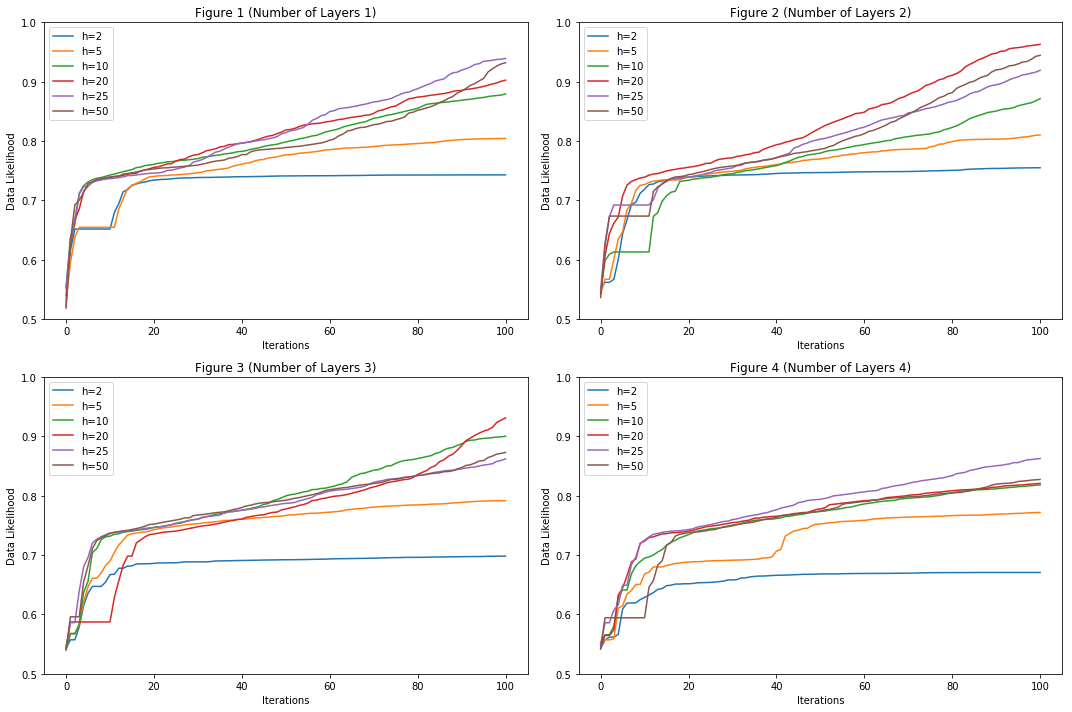

In [217]:
likelihoodList = []
accuracyList = []
dataF = []

plt.figure(figsize=(15,10))
for nHiddenLayers in [1,2,3,4]:
    plt.subplot(2,2,nHiddenLayers)
    for nHiddenUnits in [2, 5, 10, 20, 25, 50]:
        hiddenLayerStructure = [nHiddenUnits]*nHiddenLayers
        nnet = nn.NeuralNetworkClassifier(X.shape[1], hiddenLayerStructure, len(np.unique(T)))
        nnet.train(Xtrain, Ttrain, nIterations=100, verbose=False)
        Ytrain = nnet.use(Xtrain)
        Ytest = nnet.use(Xtest)
        plt.plot(np.exp(-nnet.getErrors()), label='h='+str(nHiddenUnits))
        plt.ylim(0.5, 1.0)  # easier to compare across plots
        plt.ylabel('Data Likelihood')
        plt.xlabel('Iterations')
        plt.legend(loc='best')
        
        accuracyTrain= np.sum(Ytrain == Ttrain)/ len(Ttrain) * 100
        accuracyTest= np.sum(Ytest == Ttest)/ len(Ttest) * 100
        accuracyList.append([hiddenLayerStructure,accuracyTrain,accuracyTest])
        
        likelihoodList.append(np.exp(-nnet.getErrors()))
        
    plt.title('Figure {} (Number of Layers {})'.format(nHiddenLayers, nHiddenLayers))
    
plt.tight_layout()
dataF = pd.DataFrame(accuracyList)
print(dataF)

##### Identifying Best Structure and Accuracy (Training Iterations: 100)

In this section, we identify the best hidden layer structure that resulted in maximum percentage accuracy on test data.

In [218]:
bestStructureTrain = []
bestStructureTest = []

npArr = dataF.values                                                # Convert DataFrame to Numpy Array 
maxIndicesTrain = np.where(npArr[:,1] == max(dataF[1]))[0].tolist() # Get indices where accuracy is maximum in training set
bestStructureTrain = dataF[0][maxIndicesTrain[:]].values.tolist()   # Extract the hidden structures for the best accuracies

maxIndicesTest = np.where(npArr[:,2] == max(dataF[2]))[0].tolist()  # Get indices where accuracy is maximum in testing set
bestStructureTest = dataF[0][maxIndicesTest[:]].values.tolist()     # Extract the hidden structures for the best accuracies

likelihoodArray = np.asarray(likelihoodList)        # convert the list to numpy array
maxLikelihood = (max(np.ravel(likelihoodArray)))    # flatten the numpy array and find the maximum value of likelihood
print('Best Hidden Layer Structure for Training Data: {}'.format(bestStructureTrain))
print('Best Percentage Accuracy for Training Data   : {}'.format(max(dataF[1])))
print(" ")
print('Best Hidden Layer Structure for Testing Data : {}'.format(bestStructureTest))
print('Best Percentage Accuracy for Testing Data    : {}'.format(max(dataF[2])))
print(" ")
print('Maximum Likelihood: {:f}'.format(maxLikelihood))


Best Hidden Layer Structure for Training Data: [[25], [50], [20, 20], [50, 50], [20, 20, 20]]
Best Percentage Accuracy for Training Data   : 100.0
 
Best Hidden Layer Structure for Testing Data : [[2], [2, 2], [5, 5], [5, 5, 5, 5]]
Best Percentage Accuracy for Testing Data    : 83.87096774193549
 
Maximum Likelihood: 0.963027


##### Confusion matrix for the best hidden layer structure identified on test data with training iterations 100

In [219]:
for hidden in bestStructureTest:
    netc = nn.NeuralNetworkClassifier(X.shape[1], hidden, len(np.unique(T)))
    netc.train(Xtrain, Ttrain, 100)
    print(netc)
    Ytest = netc.use(Xtest)                        # Use the above trainied model on Testing Data
    print ("\nConfusion Matrix with Best NN Structure identified on test samples")
    cm = ml.confusionMatrix(Ttest, Ytest, np.unique(Ttest).astype(int))
    print(" ")

NeuralNetwork(6, [2], 3)
   Network was trained for 101 iterations that took 0.0690 seconds. Final error is 0.2966660798053795.

Confusion Matrix with Best NN Structure identified on test samples
       1    2    3
    ------------------
 1 | 75.0 25.0  0  
 2 | 30.0 65.0  5.0
 3 |  0    0  100.0
 
NeuralNetwork(6, [2, 2], 3)
   Network was trained for 101 iterations that took 0.0847 seconds. Final error is 0.29112417648950367.

Confusion Matrix with Best NN Structure identified on test samples
       1    2    3
    ------------------
 1 | 75.0 25.0  0  
 2 | 35.0 60.0  5.0
 3 |  0    0  100.0
 
NeuralNetwork(6, [5, 5], 3)
   Network was trained for 101 iterations that took 0.1078 seconds. Final error is 0.21559320693968753.

Confusion Matrix with Best NN Structure identified on test samples
       1    2    3
    ------------------
 1 | 66.7 33.3  0  
 2 | 25.0 60.0 15.0
 3 |  0    0  100.0
 
NeuralNetwork(6, [5, 5, 5, 5], 3)
   Network was trained for 101 iterations that took 0.1288

**Observations:**
* From the above sections we see that best hidden layer structure observed for training data were [[25], [50], [20, 20], [50, 50], [20, 20, 20]] and the best percentage accuracy for the same hidden layer strucutres is 100.
* The best hidden layer structures for the neural network model used in predicting the test targets were [[2], [2, 2], [5, 5], [5, 5, 5, 5]] and the best percentage accuracy for the same structures is 83.87096774193549.
* Considering the above plots, we see that with increase in the number of hidden layers doesnt necessarily mean that the likelihood will increase. Figure 4 whcih consist of 4 hidden layers has maximum likelihood of approximately 0.8 which is less than the value of maximum likelihood observed in Neural Networks with 2 hidden layers.
* For a given number of hidden layers, increase in number of hidden units does increase the likelihood to some extent. This trend can be verified from all the four graphs above.
* Maximum likelihood achieved upon training the neural network with above specified structures is 0.963027
* Also, from confusion matrix we see that the percentage of correct prediction on samples from class 3 is higher than samples from other classes. This is because of the fact that neural network is biased toward class 3 samples as there are more number of samples available to train the network.


** Note: ** The values mentioned in the observations may not match with the above results for the new run. 

##### B.2) Train,Evaluate and Plot (Training Iterations = 500)

Let's try to understand the effect of increase in the number of iterations on performance of non-linear logistic regression.

                   0           1          2
0                [2]   90.322581  83.870968
1                [5]   92.741935  79.032258
2               [10]  100.000000  74.193548
3               [20]  100.000000  74.193548
4               [25]  100.000000  83.870968
5               [50]  100.000000  77.419355
6             [2, 2]   91.935484  83.870968
7             [5, 5]   94.354839  80.645161
8           [10, 10]  100.000000  85.483871
9           [20, 20]  100.000000  79.032258
10          [25, 25]  100.000000  80.645161
11          [50, 50]  100.000000  80.645161
12         [2, 2, 2]   78.225806  79.032258
13         [5, 5, 5]   97.580645  82.258065
14      [10, 10, 10]  100.000000  75.806452
15      [20, 20, 20]  100.000000  75.806452
16      [25, 25, 25]  100.000000  77.419355
17      [50, 50, 50]  100.000000  75.806452
18      [2, 2, 2, 2]   79.435484  79.032258
19      [5, 5, 5, 5]   96.774194  77.419355
20  [10, 10, 10, 10]  100.000000  77.419355
21  [20, 20, 20, 20]  100.000000

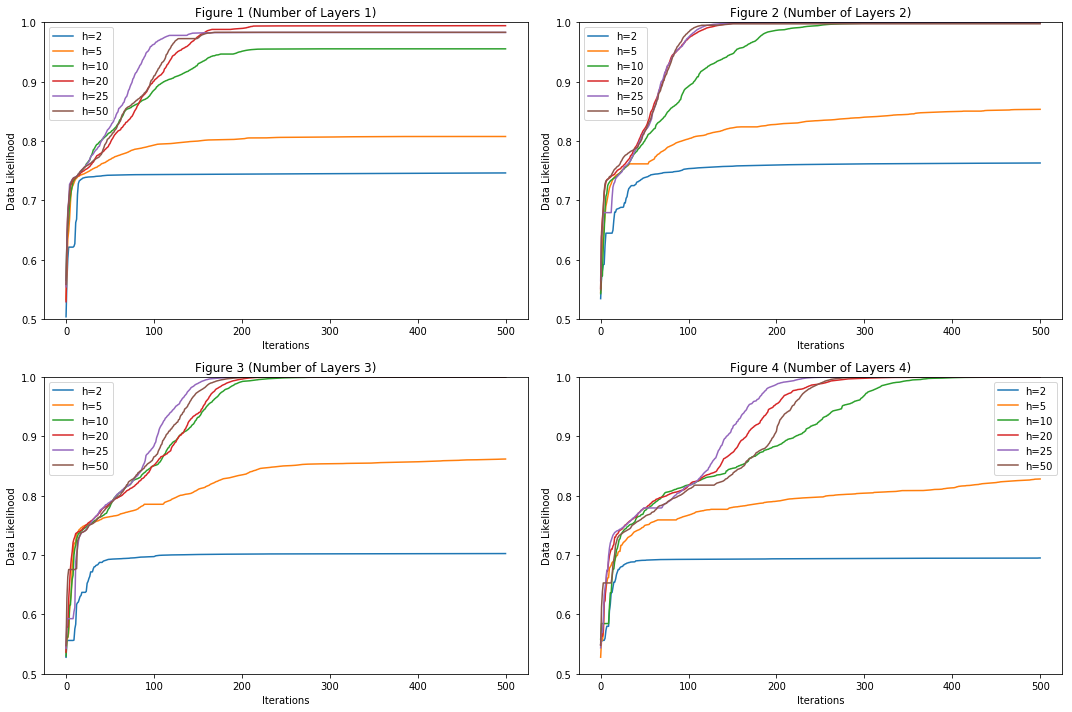

In [220]:
likelihoodList = []
accuracyList = []
dataF = []

plt.figure(figsize=(15,10))
for nHiddenLayers in [1,2,3,4]:
    plt.subplot(2,2,nHiddenLayers)
    for nHiddenUnits in [2, 5, 10, 20, 25, 50]:
        hiddenLayerStructure = [nHiddenUnits]*nHiddenLayers
        nnet = nn.NeuralNetworkClassifier(X.shape[1], hiddenLayerStructure, len(np.unique(T)))
        nnet.train(Xtrain, Ttrain, nIterations=500, verbose=False)           ## Iterations = 500
        Ytrain = nnet.use(Xtrain)
        Ytest = nnet.use(Xtest)
        plt.plot(np.exp(-nnet.getErrors()), label='h='+str(nHiddenUnits))
        plt.ylim(0.5, 1.0)  # easier to compare across plots
        plt.ylabel('Data Likelihood')
        plt.xlabel('Iterations')
        plt.legend(loc='best')
        
        accuracyTrain= np.sum(Ytrain == Ttrain)/ len(Ttrain) * 100
        accuracyTest= np.sum(Ytest == Ttest)/ len(Ttest) * 100
        accuracyList.append([hiddenLayerStructure,accuracyTrain,accuracyTest])
        
        likelihoodList.append(np.exp(-nnet.getErrors()))
        
    plt.title('Figure {} (Number of Layers {})'.format(nHiddenLayers, nHiddenLayers))
    
plt.tight_layout()
dataF = pd.DataFrame(accuracyList)
print(dataF)

##### Identifying Best Structure and Accuracy (Training Iterations: 500)

For the above results, we identify the best structures as the ones that give us maximum value of percentage accuracy seperately for training and testing. The best neural network structure would be the one which results maximum accuracy on test data.

In [221]:
bestStructureTrain = []
bestStructureTest = []

npArr = dataF.values                                                # Convert DataFrame to Numpy Array 
maxIndicesTrain = np.where(npArr[:,1] == max(dataF[1]))[0].tolist() # Get indices where accuracy is maximum in training set
bestStructureTrain = dataF[0][maxIndicesTrain[:]].values.tolist()   # Extract the hidden structures for the best accuracies

maxIndicesTest = np.where(npArr[:,2] == max(dataF[2]))[0].tolist()  # Get indices where accuracy is maximum in testing set
bestStructureTest = dataF[0][maxIndicesTest[:]].values.tolist()     # Extract the hidden structures for the best accuracies

likelihoodArray = np.asarray(likelihoodList)        # convert the list to numpy array
maxLikelihood = (max(np.ravel(likelihoodArray)))    # flatten the numpy array and find the maximum value of likelihood
print ("Following results are obtained for 500 training iterations")
print(" ")
print('Best Hidden Layer Structure for Training Data : {}'.format(bestStructureTrain))
print('Best Percentage Accuracy for Training Data    : {}'.format(max(dataF[1])))
print(" ")
print('Best Hidden Layer Structure for Testing Data  : {}'.format(bestStructureTest))
print('Best Percentage Accuracy for Testing Data     : {}'.format(max(dataF[2])))
print(" ")
print('Maximum Likelihood: {:f}'.format(maxLikelihood))


Following results are obtained for 500 training iterations
 
Best Hidden Layer Structure for Training Data : [[10], [20], [25], [50], [10, 10], [20, 20], [25, 25], [50, 50], [10, 10, 10], [20, 20, 20], [25, 25, 25], [50, 50, 50], [10, 10, 10, 10], [20, 20, 20, 20], [25, 25, 25, 25], [50, 50, 50, 50]]
Best Percentage Accuracy for Training Data    : 100.0
 
Best Hidden Layer Structure for Testing Data  : [[10, 10]]
Best Percentage Accuracy for Testing Data     : 85.48387096774194
 
Maximum Likelihood: 1.000000


##### Confusion matrix for best hidden layer structure identified on test data with training iterations 500.

In [222]:
for hidden in bestStructureTest:
    netc = nn.NeuralNetworkClassifier(X.shape[1], hidden, len(np.unique(T)))
    netc.train(Xtrain, Ttrain, 500)
    print(netc)
    Ytest = netc.use(Xtest)                        # Use the above trainied model on Testing Data
    print ("\nConfusion Matrix with Best NN Structure identified on test samples")
    cm = ml.confusionMatrix(Ttest, Ytest, np.unique(Ttest).astype(int))
    print(" ") 

NeuralNetwork(6, [10, 10], 3)
   Network was trained for 501 iterations that took 0.6151 seconds. Final error is 0.0004039968130653847.

Confusion Matrix with Best NN Structure identified on test samples
       1    2    3
    ------------------
 1 | 58.3 33.3  8.3
 2 | 25.0 55.0 20.0
 3 |  0    0  100.0
 


**Observations:**
* From the above results of training different neural networks structures for 500 iterations, we see that there is a significant improvement in the likelihood and percentage of correct prediction.
* Upon training the NN for 500 iterations, more number of structures result in 100 percent accuracy on training data. 
* Also, percentage accuracy on test data is significantly higher than that of the networks trained for less number of iterations.
* Maximum likelihood achieved is 1, which is again the desired likelihood for any classification problem.
* Comparing the above results with section B.2, we can say that for a given hidden layer structure in neural network, percentage accuracy can be increased to some extent by traninig the network for more iterations.

### 3.4) Classification with Linear Logistic Regression:

In this section, we will be implementing a linear logisitic regression model an evaluate the performance of this network.
We can build a linear model from the above non-linear regression algorithm by just specifying the number of hidden layers as zero.<br>

**Note:** Constructor in NeuralNetwork class has been modified to take both scalar '0' and list '[0]'.

#### 3.4.1) Train Neural Network with 0 hidden layer:
AS discussed, let's train the neural network with 0 hidden layers for 100 iterations. 

In [223]:
import neuralnetworksA4 as nn

netc = nn.NeuralNetworkClassifier(X.shape[1], 0, len(np.unique(T)))
netc.train(Xtrain, Ttrain, 100, verbose=True)
print(netc)

SCG: Iteration 10 fValue Eval 0.0950347337987 Scale 1.953125e-09
SCG: Iteration 20 fValue Eval 0.0943033629231 Scale 1e-06
SCG: Iteration 30 fValue Eval 0.094147584214 Scale 0.000256
SCG: Iteration 40 fValue Eval 0.0938553646371 Scale 2.5e-07
SCG: Iteration 50 fValue Eval 0.0938296850931 Scale 2.44140625e-10
SCG: Iteration 60 fValue Eval 0.0938295435098 Scale 7.8125e-09
SCG: Iteration 70 fValue Eval 0.0938295435098 Scale 0.008192
SCG: Iteration 80 fValue Eval 0.0938295435098 Scale 8589.934592
SCG: Iteration 90 fValue Eval 0.0938295435097 Scale 4294.967296
SCG: Iteration 100 fValue Eval 0.0938295434311 Scale 4.194304
NeuralNetwork(6, [], 3)
   Network was trained for 101 iterations that took 0.0381 seconds. Final error is 0.3063160841861327.


No that we have created trained the neural network, let's plot the data likelihood for the same network.

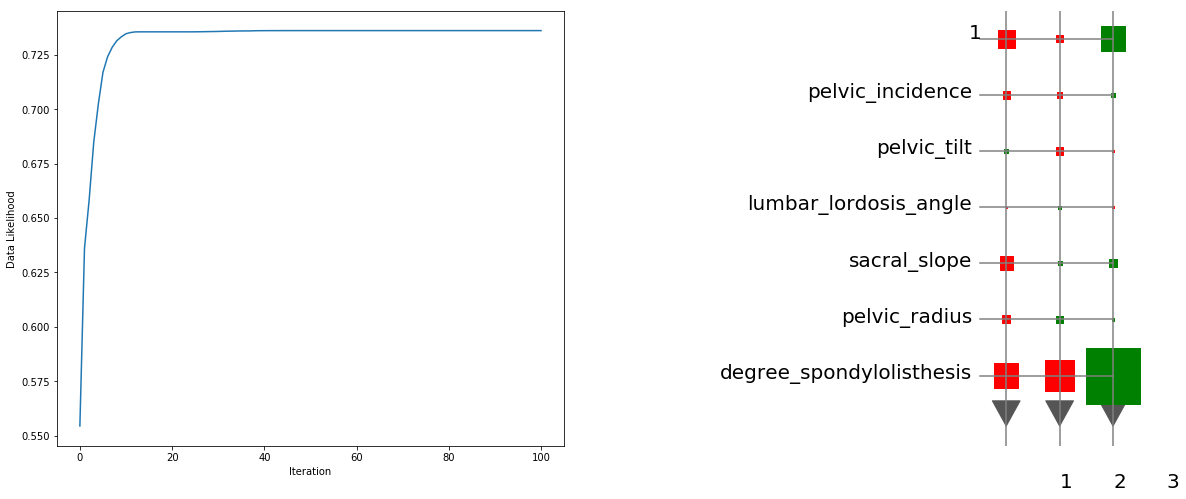

In [224]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.plot(np.exp(-netc.getErrors()))      # negate as scg is meant to minimize the function
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')
plt.subplot(1, 2, 2)
netc.draw(inputNames = headings[0:6], outputNames = np.unique(modDF['class']).tolist())


**Observations:**
* From the above plot of likelihood, we see that for a linear logistic regression which has no hidden layers, the maximum likelihood achieved is 0.725. If we compare this plot with likelihood plot of non-linear neural network in section 3.3 A(with hidden layer [5, 5], we see that the vlaue of likelihood above particular number of iterations is constant at approximately 0.725. Whereas, in non linear LR based NN, the likelihood keeps on increasing with number of interaions.
* From the NN structure drawn above, we see that the outputs are linear related to the inputs. In other words, the target outputs are weighted sum of all the inputs. The weights are indicated by the colored squares. 
* The inputs which are connected to green squares should have higher than average value for the network output to respond positively. 

**Note:** The values mentioned in this observation may not match with the above results when trained and evaluated again.

#### 3.4.2) Evaluate Neural Network (Target predictions for Training and Testing)
In this section, we will evaluate the performance of linear logistic regression model by applying it on training and test partitions. By determining the percentage accuracy on prediction, we will get a get a better idea of the performance.

Percentage of Correct Prediction with Linear LR on Training Data : 87.09677419354838
Percentage of Correct Prediction with Linear LR on Test Data     : 85.48387096774194


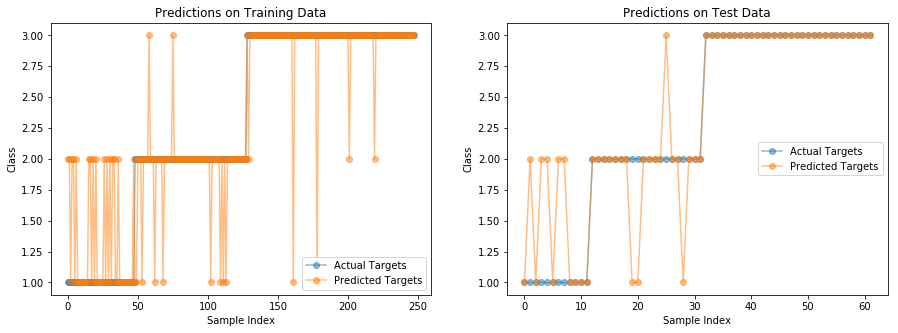

In [225]:
Ytrain = netc.use(Xtrain)                      # Use the above trainied model on Training Data 
Ytest = netc.use(Xtest)                        # Use the above trainied model on Testing Data

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.hstack((Ttrain, Ytrain)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')

plt.subplot(1, 2 ,2)
plt.plot(np.hstack((Ttest, Ytest)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='right')

print('{:s} {:}'.format('Percentage of Correct Prediction with Linear LR on Training Data :',percentCorrect(Ytrain, Ttrain)))
print('{:s} {:}'.format('Percentage of Correct Prediction with Linear LR on Test Data     :',percentCorrect(Ytest, Ttest)))


In [226]:
print ("Confusion Matrix for Training Samples")
cm = ml.confusionMatrix(Ttrain, Ytrain, np.unique(Ttrain).astype(int))

print ("\nConfusion Matrix for Testing Samples")
cm = ml.confusionMatrix(Ttest, Ytest, np.unique(Ttest).astype(int))

Confusion Matrix for Training Samples
       1    2    3
    ------------------
 1 | 66.7 33.3  0  
 2 | 11.2 86.2  2.5
 3 |  1.7  2.5 95.8

Confusion Matrix for Testing Samples
       1    2    3
    ------------------
 1 | 58.3 41.7  0  
 2 | 15.0 80.0  5.0
 3 |  0    0  100.0


**Observations:**
* Considering the results in section 3.4.2, Linear logistic regression does seem to perform better than LDA & QDA based classification.
* From the confusion matrix for testing samples above, we see that there is 100 percent accuracy on predicting samples from class 3 and slightly less in case of samples from class 2. The accuracy is least for samples from class 1. This is due to the biasing of network toward class 3 samples. 
* prediction accuracy on test data is observed to be equal to the accuracy of non linear logistic regression model trained with 500 iterations, for this specific run. However, for previous multiple runs, the prediction accuracy for linear logistic regression based model was slightly less than what was observed for Non-linear logistic regression model trained with 500 iterations.

## Conclusion:
Considering the results of application of different classification algorithms on sample and orthopaedic data, following conclusions have been made.
* For the given data set, upon running the above code blocks we see that performance of QDA and LDA is not as good as that of the logistic regression based classification techniques.
* Considering the results of percentage accuracy for all the above classifcations, non linear logistic regression when trained for 500 iterations, resulted in best percentage of correctness. 
* Comparing the results of non-linear logistic regression trained with 500 iterations and 100 iterations, we could say that with increase in the number of training iterations does result in better performance. 
* Data likelihood as seen in plots of different classification algorithms does seem to be dependent on neural network structure which includes number of hidden layers, number of units in the hidden layers and number of training iterations.
* It is interesting to observe how increase in the number of hidden layers does not necessarily maximize the likelihood. 
* Better likelihood can also be resulted in less number of hidden laeyr structure as number of units also play a major role in affecting it.
* From the results of confusion matrix, it is clearly evident that biased training has played a major role in predictions. As we train the classification model with more number of samples from class 3, the model learn those samples better than samples from any other class. Which is why most of the time the accuracy in predicting samples from class 3 is significantly higher than accuracy in predicting samples from class 2 and class 1.

## Grading and Check-in

In [227]:
%run -i A4grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Vichare-A4.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing  import neuralnetworksA4 as nn

--- 5/5 points. The statement  import neuralnetworksA4 as nn  works.

Testing  import mlutilities as ml

--- 5/5 points. The statement  import mlutilities as ml  works.

Testing X = np.vstack((np.arange(20), [7, 4, 5, 5, 8, 4, 6, 7, 4, 9, 4, 2, 6, 6, 3, 3, 7, 2, 6, 4])).T
        T = np.array([1]*8 + [2]*8 + [3]*4).reshape((-1, 1))
        Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, 0.8, classification=True, shuffle=False)

--- 10/10 points. ml.partition works correctly

Testing nnet = nn.NeuralNetworkClassifier(2, [5, 5], 3)

--- 10/10 points. nn.NeuralNetworkClassifier did not throw exception.

Testing nnet.train(Xtrain, Ttrain, 200)

--- 20/20 points. nnet.getErrors()[-1] is less than 1.e-5.

Testing 

## References:
The references below include lecture notes for CS445 addressing different classification techniqes along with examples.

[1] Lecture Notes 12:
http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs445/notebooks/12%20Introduction%20to%20Classification.ipynb<br>
[2] Lecture Notes 14: http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs445/notebooks/14%20Classification%20with%20Linear%20Logistic%20Regression.ipynb<br>
[3] Lecture Notes 15:
http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs445/notebooks/15%20Classification%20with%20Nonlinear%20Logistic%20Regression%20Using%20Neural%20Networks.ipynb<br>
[4] Lecture Notes 17: http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs445/notebooks/17%20Analysis%20of%20Neural%20Network%20Classifiers%20and%20Bottleneck%20Networks.ipynb
[5] Submitted Assignments 2 & 3